# Importing the data

In [546]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, classification_report, confusion_matrix, f1_score

#best hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
!pip install imbalanced-learn

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [547]:
path = "C:\\Users\\ramya\\Downloads\\Cancer.csv"
df = pd.read_csv(path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Exploring the data

In [548]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [549]:
df.shape

(569, 32)

In [550]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [551]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [552]:
df = df.drop(columns=["id"])

# Spliting the data for modeling

In [553]:
features = df.drop(columns = ["diagnosis"])
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [554]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [555]:
target = df ["diagnosis"].replace({"M":True, "B":False})
target

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [556]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)

In [557]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [558]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.229620,...,0.467805,0.356876,0.436725,0.286030,0.508684,0.380196,0.282137,0.678351,0.355038,0.319306
1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.188750,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.195155,0.341880,0.558419,0.189639,0.230967
2,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.397495,...,0.062931,0.214552,0.052244,0.024651,0.181206,0.027487,0.012581,0.047732,0.338641,0.244459
3,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.248297,...,0.184988,0.193763,0.185467,0.084718,0.207555,0.236995,0.262906,0.314089,0.264021,0.353678
4,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.150297,...,0.186766,0.128731,0.167837,0.085504,0.222083,0.044091,0.042060,0.164708,0.173954,0.048506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.606228,0.521136,0.598507,0.444751,0.441184,0.427949,0.596298,0.571074,0.576768,0.239288,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.394033,0.484872,0.595189,0.413260,0.315237
451,0.178380,0.177883,0.169097,0.089841,0.228401,0.098184,0.052741,0.039140,0.171212,0.145902,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.104337,0.083376,0.117285,0.174430,0.133633
452,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.321468,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.782014,0.561197,0.652577,0.415162,0.842596
453,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.178203,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.136183,0.053256,0.273643,0.156844,0.224435


In [559]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.523401,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.369214,0.275128,0.380756,0.299667,0.394796
1,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.385190,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.427527,0.427863,0.717526,0.554658,0.671271
2,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.317732,...,0.206688,0.210821,0.191245,0.098358,0.509344,0.197132,0.191538,0.362887,0.431084,0.435057
3,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.088113,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.238532,0.302393,0.539863,0.389734,0.151729
4,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.059328,...,0.331910,0.663380,0.297276,0.183396,0.288120,0.078376,0.132222,0.225945,0.396150,0.068958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.401297,0.073723,0.405708,0.251707,0.659655,0.417520,0.476101,0.545229,0.457576,0.449352,...,0.386339,0.133795,0.371483,0.225324,0.541042,0.363504,0.498291,0.627835,0.392110,0.490309
110,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.037135,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.921371,0.587094,0.884880,1.205323,1.261270
111,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.664030,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.449380,1.070085,0.601375,0.632605,0.666988
112,0.357281,0.325668,0.348697,0.218961,0.282116,0.179805,0.206584,0.145378,0.208586,0.158646,...,0.297759,0.436301,0.287315,0.158597,0.249158,0.260935,0.322991,0.329691,0.215067,0.207945


In [560]:
x_test_norm.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.321939,0.315229,0.316283,0.200508,0.394371,0.251812,0.200095,0.229830,0.380223,0.282695,...,0.276416,0.361026,0.263417,0.151673,0.410210,0.241076,0.232927,0.377183,0.332362,0.320918
std,0.147298,0.131552,0.146710,0.128915,0.138418,0.172300,0.182205,0.180475,0.142197,0.182704,...,0.142366,0.148274,0.138764,0.109500,0.167206,0.183951,0.193257,0.207245,0.172612,0.245229
min,0.033603,0.022658,0.031442,0.011410,0.141284,0.051408,0.000000,0.000000,0.154040,-0.006152,...,0.026610,0.090085,0.020320,0.009438,0.112593,0.026378,0.000000,0.000000,-0.000238,-0.001820
25%,0.222751,0.219817,0.217210,0.117253,0.291708,0.129532,0.072727,0.101404,0.275884,0.153867,...,0.189345,0.256463,0.177785,0.085117,0.276233,0.119903,0.105214,0.213325,0.218988,0.160108
50%,0.296228,0.307575,0.286262,0.171007,0.362418,0.186216,0.124051,0.154125,0.343434,0.242584,...,0.250978,0.363140,0.235893,0.124717,0.386515,0.190488,0.187479,0.333488,0.301568,0.262662
75%,0.378816,0.397869,0.372745,0.234634,0.489934,0.317680,0.278175,0.319160,0.486237,0.369699,...,0.333333,0.455357,0.336994,0.182529,0.509179,0.303022,0.311282,0.509708,0.398111,0.395679
max,0.957878,0.679743,0.955774,0.893531,0.811321,0.895712,0.747188,0.933400,0.776263,1.037135,...,0.896122,0.763859,0.848598,0.744888,0.915472,1.131890,1.070085,0.923711,1.205323,1.630689


# Balancing Data

In [561]:
# sampling startaegy mena we want same size for both samples
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [562]:
X_train_sm,y_train_sm = sm.fit_resample(x_train_norm,y_train)

# 1- KNN

In [563]:
knn = KNeighborsClassifier(n_neighbors=12)

In [564]:
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=12)

In [565]:
knn.score(x_test_norm, y_test)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9473684210526315

In [566]:
pred_knn = knn.predict(x_test_norm)

print("accuracy", knn.score(x_test_norm, y_test))

accuracy 0.9473684210526315


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

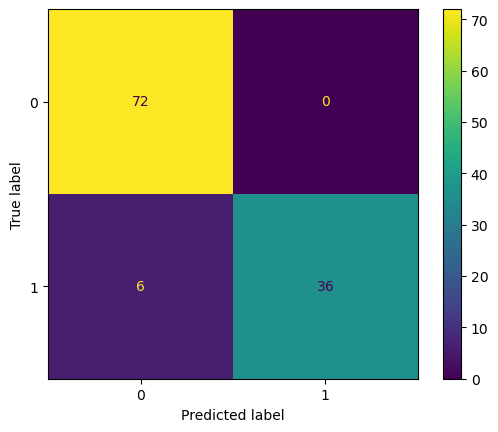

In [567]:
cm = confusion_matrix(y_test, pred_knn, labels= knn.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [568]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8571428571428571


### KNN Hyperparameters

In [569]:
kn_grid = {'n_neighbors': list(range(1, 21))}

In [570]:
kn_cla = KNeighborsClassifier(DecisionTreeClassifier())

In [571]:
kn_model = GridSearchCV(KNeighborsClassifier(), param_grid = kn_grid)

In [572]:
kn_model.fit(x_train_norm, y_train)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [573]:
kn_model.best_params_

{'n_neighbors': 6}

In [574]:
kn_model = KNeighborsClassifier(n_neighbors = 6)

In [575]:
kn_Classifier = KNeighborsClassifier(n_neighbors=6)
kn_Classifier.fit(x_train_norm, y_train)
print(kn_Classifier.score(x_test_norm, y_test))

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9473684210526315


In [576]:
pred_knn_hyp = kn_Classifier.predict(x_test_norm)

print("accuracy", kn_Classifier.score(x_test_norm, y_test))

accuracy 0.9473684210526315


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

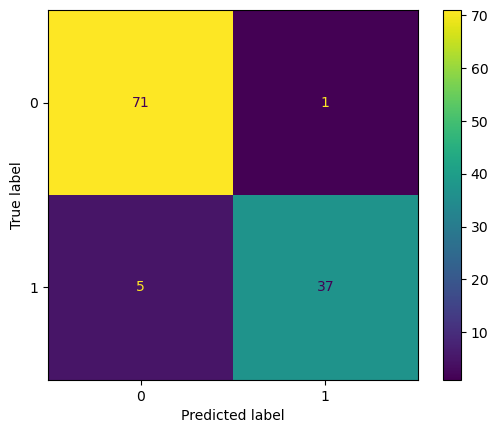

In [577]:
cm = confusion_matrix(y_test, pred_knn_hyp, labels= kn_Classifier.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [578]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9736842105263158
Recall: 0.8809523809523809


### KNN Hyperparameter Balanced

In [579]:
knn_bal = KNeighborsClassifier(n_neighbors=6)

In [580]:
knn_bal.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=6)

In [581]:
knn_bal.score(x_test_norm,y_test)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9473684210526315

### KNN Hyperparameters Balanced Confusion Matrix

In [582]:
pred_knn = knn_bal.predict(x_test_norm)
print(classification_report(y_pred = pred_knn, y_true = y_test))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96        72
        True       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


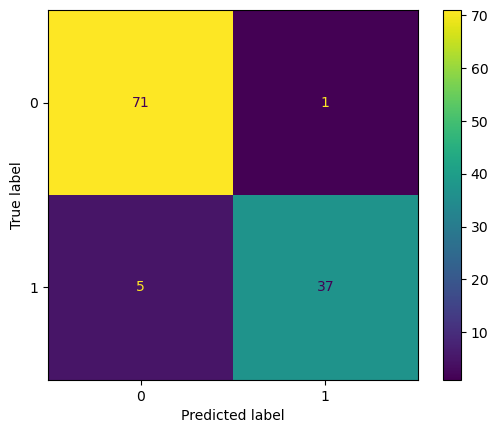

In [583]:
cm = confusion_matrix(y_test, pred_knn, labels= knn_bal.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [584]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9736842105263158
Recall: 0.8809523809523809


# 2- Decision Tree Classifier

In [585]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 30)

In [586]:
tree.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=30)

In [587]:
tree.score(x_test_norm,y_test)

0.9385964912280702

In [588]:
pred_tree = tree.predict(x_test_norm)
print(classification_report(y_pred = pred_tree, y_true = y_test))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95        72
        True       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



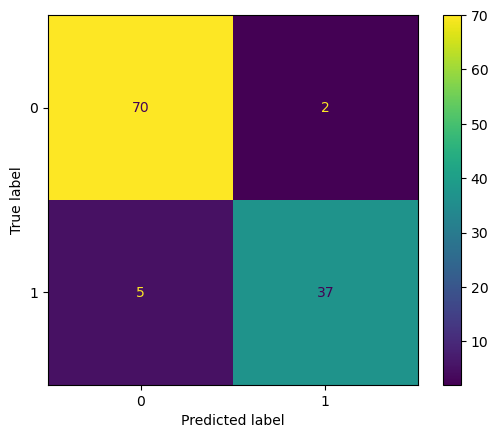

In [589]:
cm = confusion_matrix(y_test, pred_tree, labels= tree.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [590]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9487179487179487
Recall: 0.8809523809523809


# - AdaBoost

In [591]:
#Initialize a AdaBoost model
ada_cla = AdaBoostClassifier(DecisionTreeClassifier(max_depth=30),
                            n_estimators=100)

In [592]:
#Training the model
ada_cla.fit(x_train_norm, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=30),
                   n_estimators=100)

In [593]:
#Evaluate the model
pred_ada = ada_cla.predict(x_test_norm)

print("Accuracy", ada_cla.score(x_test_norm, y_test))

Accuracy 0.956140350877193


              precision    recall  f1-score   support

       False       0.96      0.97      0.97        72
        True       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



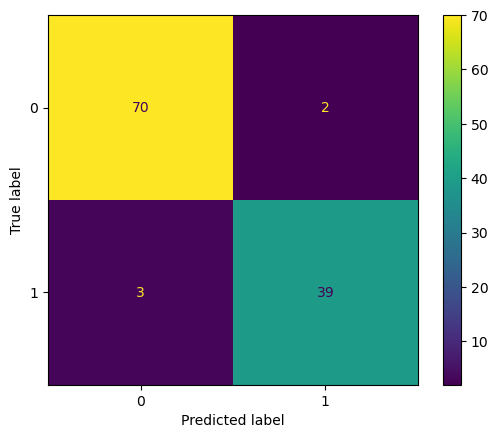

In [594]:
print(classification_report(y_pred = pred_ada, y_true = y_test))
cm = confusion_matrix(y_test, pred_ada, labels= ada_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [595]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)

recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9512195121951219
Recall: 0.9285714285714286


# - Gradient Boosting

In [596]:
#Initialize a GradBoost model
gb_cla = GradientBoostingClassifier(max_depth=30,
                                   n_estimators=100)

In [597]:
#Training the model
gb_cla.fit(x_train_norm, y_train)

GradientBoostingClassifier(max_depth=30)

In [598]:
#Evaluate the model
pred_gra = gb_cla.predict(x_test_norm)

print("Accuracy", gb_cla.score(x_test_norm, y_test))

Accuracy 0.9385964912280702


              precision    recall  f1-score   support

       False       0.93      0.97      0.95        72
        True       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



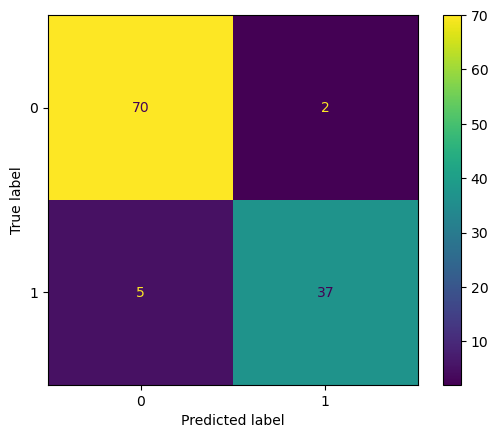

In [599]:
print(classification_report(y_pred = pred_gra, y_true = y_test))
cm = confusion_matrix(y_test, pred_gra, labels= gb_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [600]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)

recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9487179487179487
Recall: 0.8809523809523809


# - Bagging 

In [601]:
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=20)

In [602]:
bagging_cla.fit(x_train_norm, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),
                  n_estimators=20)

In [603]:
pred_ba = bagging_cla.predict(x_test_norm)


print("accuracy", bagging_cla.score(x_test_norm, y_test))

accuracy 0.956140350877193


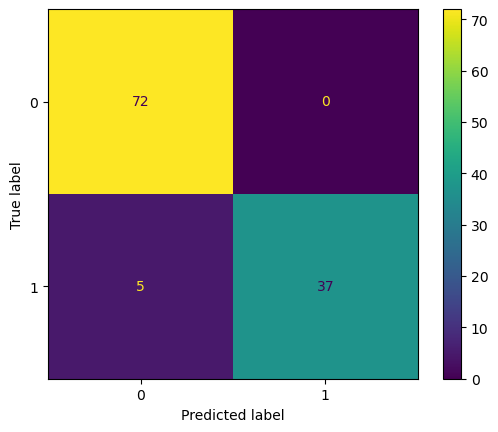

In [604]:
cm = confusion_matrix(y_test, pred_ba, labels= bagging_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [605]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8809523809523809


### Bagging Hyperparameters

In [606]:
bag_grid = {"n_estimators": [50,80,100]}

In [607]:
bag_cla = BaggingClassifier(DecisionTreeClassifier())

In [608]:
bag_model = GridSearchCV(estimator = bag_cla, param_grid = bag_grid, cv=5)

In [609]:
bag_model.fit(x_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [50, 80, 100]})

In [610]:
bag_model.best_params_

{'n_estimators': 50}

In [611]:
best_model = bag_model.best_params_

In [612]:
best_model

{'n_estimators': 50}

In [613]:
bag_cla = BaggingClassifier(n_estimators= 100)
bag_cla.fit(x_train_norm, y_train)

BaggingClassifier(n_estimators=100)

In [614]:
pred_hy = bag_cla.predict(x_test_norm)

print("accuracy", bag_cla.score(x_test_norm, y_test))

accuracy 0.956140350877193


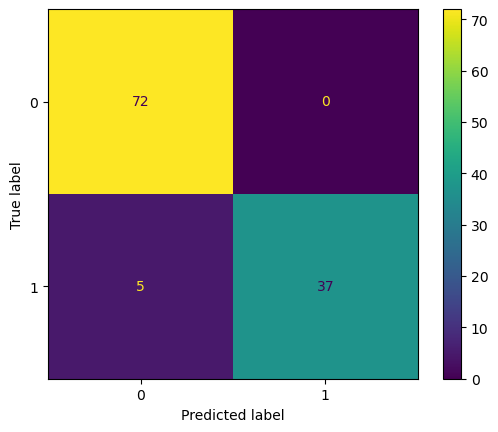

In [615]:
cm = confusion_matrix(y_test, pred_hy, labels= bag_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [616]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.8809523809523809


### Bagging Hyperparameters balanced 

In [617]:
bag_model.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [50, 80, 100]})

In [618]:
bag_model.best_params_

{'n_estimators': 100}

In [619]:
best_model = bag_model.best_params_

In [620]:
best_model

{'n_estimators': 100}

In [621]:
bag_cla = BaggingClassifier(n_estimators= 80)
bag_cla.fit(X_train_sm, y_train_sm)

BaggingClassifier(n_estimators=80)

In [622]:
pred_bag_bal = bag_cla.predict(x_test_norm)

print("accuracy", bag_cla.score(x_test_norm, y_test))

accuracy 0.9649122807017544


### Bagging Blanced Hyperparameters Confusion Matrix

In [623]:
print(classification_report(y_pred = pred_bag_bal, y_true = y_test))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97        72
        True       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



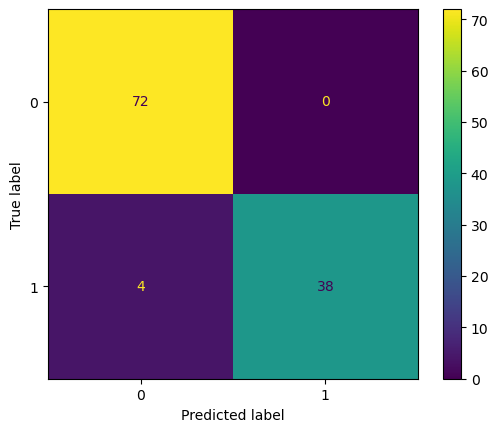

In [624]:
cm = confusion_matrix(y_test, pred_bag_bal, labels= bag_cla.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [625]:
# Extract true positives, false positives, false negatives from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.9047619047619048


# Random Patches

In [102]:
#Initialize a Random Forest
#forest = RandomForestClassifier(n_estimators=100,
                             max_depth=30)

In [135]:
ran_grid = {"n_estimators": [50,80,100], "min_samples_split": [40, 60, 100]}

In [136]:
rf_cla = RandomForestClassifier(DecisionTreeClassifier())

In [137]:
ran_model = GridSearchCV(estimator = rf_cla, param_grid = ran_grid, cv=5)

In [138]:
ran_model.fit(x_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=DecisionTreeClassifier()),
             param_grid={'min_samples_split': [40, 60, 100],
                         'n_estimators': [50, 80, 100]})

In [144]:
ran_model.best_params_

{'min_samples_split': 40, 'n_estimators': 50}

In [145]:
best_model = ran_model.best_estimator_

In [146]:
best_model

RandomForestClassifier(min_samples_split=40, n_estimators=50)

In [147]:
rf_cla = RandomForestClassifier(min_samples_split=40, n_estimators= 100)
rf_cla.fit(x_train_norm, y_train)

RandomForestClassifier(min_samples_split=40)

In [149]:
#Evaluate the model
pred = rf_cla .predict(x_test_norm)

print("Accuracy", rf_cla.score(x_test_norm, y_test))

Accuracy 0.956140350877193
